---
title: "Can AutoDiffs Solve Ohm's Law as a Linear Regression Problem"
date: "2022-04-18"
toc: true
badges: true
author: Emre Kara
categories: [Python, D2L, Torch, LineerRegression, AutoDiff]
image: ohms_law_formula.png
---

# Can auto differentiations  solve the Ohm's law as Linear Regression Problem?
> Hypotethical and Practical approach for one of D2L Exercise Questions, Can auto differentiations  solve the Ohm's law as Linear Regression Problem?

The question and some of the codes in this study are taken from the a part of the D2L[^1]

## Problem Definition

**Dive Into Deep Learning - 3.2.9.2:** Assume that you are Georg Simon Ohm
   trying to come up
   with a model between voltage and current. Can you use auto differentiation to learn the parameters of your model?


**Ohm's law:**[^2]

![](ohms_law_formula.png)

## Introduction

Using Linear Regression is more suitable in such situations, that all the points in data locates nearly linear form. In real world problems we can check this with different methods i.e: Plotting the data points and check manually. But in our situation, if the problem has exact formula like above, we can check it directly by comparing our formula to linear equation formula

"A linear regression line has an equation of the form $Y = a + bX$, where $X$ is the explanatory variable and $Y$ is the dependent variable. The slope of the line is $b$, and $a$ is the intercept (the value of $y$ when $x = 0$)."[^3]

1- İf we expand the linear equation formula with 2 independent variable as in ohm'law equation, we get something like that:

$$y = a + bX₁ + cX₂$$

2- Now we can use the I and R as independent variables and V as dependent variable in Ohm's law. If I,R and V were linearly related, ohm's formula would look like this, as you can see this is so far from ohm's law. So, we can say: Ohm's law formula is not suitable for solving the equation with Linear Regression.

$$V = a + bI + cR$$

3- As you can remember, Our challenge was not only applying Linear Regression on ohm'law, Also using automatic differentiations to learn parameters while doing this

The using auto differentiations to learn parameters is called "Gradient Descent"

Learning the parameters is optimization method which tries to find optimal parameters which is giving minimum error. And Gradient Descent is the method that tells us which way to go to find optimal parameters. 

In the first two steps, I think we proved that we cannot use automatic derivatives to learn parameters by using math and equations, But let's get our hands dirty and show it practically too

## Method

In this method (using auto differentiations to learn parameters), we expect to approach the optimal parameters step by step by reducing our error in each iteration.
If our assumption was true, **we should observe our error is decreasing between steps**

In [6]:

#import necessary packages
%matplotlib inline
import random
import torch
import numpy as np
from d2l import torch as d2l

## Creating Data

In [7]:

#defining ohm's law as function, to generate our data
def ohm(I, R):
    V = I * R
    return V.reshape((-1, 1))

In [8]:

#create features tensor which contains I, R in ohm's law by using torch.rand
features = torch.rand((10000, 2))
print(features[:5])

tensor([[0.2545, 0.4350],
        [0.0933, 0.9536],
        [0.3683, 0.1007],
        [0.4511, 0.9855],
        [0.7594, 0.6987]])


In [9]:

#create labels tensor which contains V in ohm's law calculation by using ohm function defined above
labels = ohm(features[:,0], features[:,1])
print(labels[:5])

tensor([[0.1107],
        [0.0890],
        [0.0371],
        [0.4446],
        [0.5306]])


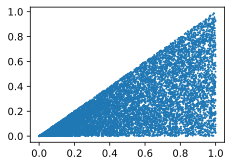

In [10]:

#plotting traindata
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

In [11]:

# defining data_iterator for giving data into model part by part
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

## Building Model

In [12]:

#set initial values of weights and bias term
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#Creating Lineer Regression Network
net = d2l.linreg

#define Loss Function as Squared Error
loss = d2l.squared_loss

## Training

In [13]:

#set training hyperparameters
lr = 0.03
num_epochs = 15
batch_size = 10
loss_of_epochs = {}

In [14]:

#iterate over epochs and train network
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        d2l.sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        epoch_number = epoch + 1
        epoch_loss = float(train_l.mean())
        print(f'epoch {epoch_number}, loss {epoch_loss:f}')
        loss_of_epochs[epoch_number] = epoch_loss

epoch 1, loss 0.004080
epoch 2, loss 0.003574
epoch 3, loss 0.003491
epoch 4, loss 0.003520
epoch 5, loss 0.003493
epoch 6, loss 0.003496
epoch 7, loss 0.003525
epoch 8, loss 0.003490
epoch 9, loss 0.003498
epoch 10, loss 0.003494
epoch 11, loss 0.003489
epoch 12, loss 0.003491
epoch 13, loss 0.003505
epoch 14, loss 0.003501
epoch 15, loss 0.003497


## Results

Text(0, 0.5, 'Squared Error Loss')

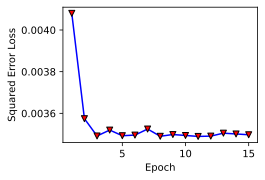

In [15]:

#plotting results data
d2l.set_figsize()
epoch_numbers = np.array(list(loss_of_epochs.keys()))
losses = np.array(list(loss_of_epochs.values()))
d2l.plt.plot(epoch_numbers, losses, '-v',  c='blue', mfc='red', mec='k', label='Loss in each epochs')
d2l.plt.xlabel("Epoch")
d2l.plt.ylabel("Squared Error Loss")

## Conclusion

As you can see in results, we don't get considerable decreasing in loss between epochs even there is promising decreasing between epoc 1 and epoch 2. The difference between our first(0.004080) and last(0.003497) epoch loss is just 0.000583(14.2%). This means that our model fails while learning from the data. Also confirms us about our theorical approach at beginning of this document

## Discussion

In this study, our data consists of 10,000 points generated according to the ohm rule. If we had generated the data sample in smaller numbers such as 100 or 1000, we would have observed much more significant reductions in the losses of our Neural Network linear regression model between epochs. So, why does this happen and does our result in this study depend on the number of data samples?

[^1]: [Dive Into Deep Learning book, Section 3.2.9](https://d2l.ai/index.html)
[^2]: [Ohm law](https://en.wikipedia.org/wiki/Ohm%27s_law)
[^3]: [Yale University Linear Regression Course 1997-98](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)